In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

In [5]:
# Define the model architecture
def create_model():
    model = Sequential()
    model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=120, activation='relu'))
    model.add(Dense(units=84, activation='relu'))
    model.add(Dense(units=43, activation='softmax'))
    return model


In [6]:

# Preprocess the images
def preprocess_img(image):
    resized_image = cv2.resize(image, (32, 32))
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    equalized_image = cv2.equalizeHist(gray_image)
    return equalized_image / 255.0


train_images = []
test_images = []
train_labels = []
test_labels = []



In [7]:

# Load the training images and labels
train_csv = pd.read_csv('C:/Users/Ambipalm/Downloads/archive (10)/Train.csv')
meta_csv = pd.read_csv('C:/Users/Ambipalm/Downloads/archive (10)/Meta.csv')
class_names = [f"Class {i}" for i in range(1, 44)]  # Assuming there are 43 classes, update the range accordingly

for index, row in train_csv.iterrows():
    img_path = row['Path']
    img_full_path = os.path.join('C:/Users/Ambipalm/Downloads/archive (10)', img_path)
    img = cv2.imread(img_full_path)
    if img is None:
        print(f"Image not found or cannot be read: {img_full_path}")
        continue
    img_preprocessed = preprocess_img(img)
    train_images.append(img_preprocessed)
    train_labels.append(row['ClassId'])


In [8]:

# Load the test images and labels
test_csv = pd.read_csv('C:/Users/Ambipalm/Downloads/archive (10)/Test.csv')

for index, row in test_csv.iterrows():
    img_path = row['Path']
    img_full_path = os.path.join('C:/Users/Ambipalm/Downloads/archive (10)', img_path)
    img = cv2.imread(img_full_path)
    if img is None:
        print(f"Image not found or cannot be read: {img_full_path}")
        continue
    img_preprocessed = preprocess_img(img)
    test_images.append(img_preprocessed)
    test_labels.append(row['ClassId'])



In [9]:

# Convert the data to numpy arrays
train_images = np.array(train_images)
test_images = np.array(test_images)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)


In [10]:

# Expand the dimensions of the images to match the input dimensions of the model
train_images_expanded = train_images.reshape(-1, 32, 32, 1)
test_images_expanded = test_images.reshape(-1, 32, 32, 1)


In [11]:

# Convert the labels to one-hot encoded vectors
train_labels_one_hot = to_categorical(train_labels, num_classes=43)
test_labels_one_hot = to_categorical(test_labels, num_classes=43)

# Create the model
model = create_model()

# Compile the model
model.compile(optimizer=Adam(learning_rate=.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images_expanded, train_labels_one_hot, batch_size=32, epochs=10, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images_expanded, test_labels_one_hot)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")


Epoch 1/10
981/981 [==============================] - 7s 7ms/step - loss: 1.2484 - accuracy: 0.6351 - val_loss: 26.8532 - val_accuracy: 0.0000e+00
Epoch 2/10
981/981 [==============================] - 6s 6ms/step - loss: 0.2930 - accuracy: 0.9117 - val_loss: 24.2232 - val_accuracy: 0.0000e+00
Epoch 3/10
981/981 [==============================] - 6s 6ms/step - loss: 0.1704 - accuracy: 0.9497 - val_loss: 28.7094 - val_accuracy: 6.3759e-04
Epoch 4/10
981/981 [==============================] - 7s 7ms/step - loss: 0.1246 - accuracy: 0.9609 - val_loss: 28.3270 - val_accuracy: 1.2752e-04
Epoch 5/10
981/981 [==============================] - 7s 7ms/step - loss: 0.0885 - accuracy: 0.9718 - val_loss: 29.3137 - val_accuracy: 3.8256e-04
Epoch 6/10
981/981 [==============================] - 7s 7ms/step - loss: 0.0682 - accuracy: 0.9790 - val_loss: 31.9213 - val_accuracy: 8.9263e-04
Epoch 7/10
981/981 [==============================] - 7s 7ms/step - loss: 0.0593 - accuracy: 0.9806 - val_loss: 31.968

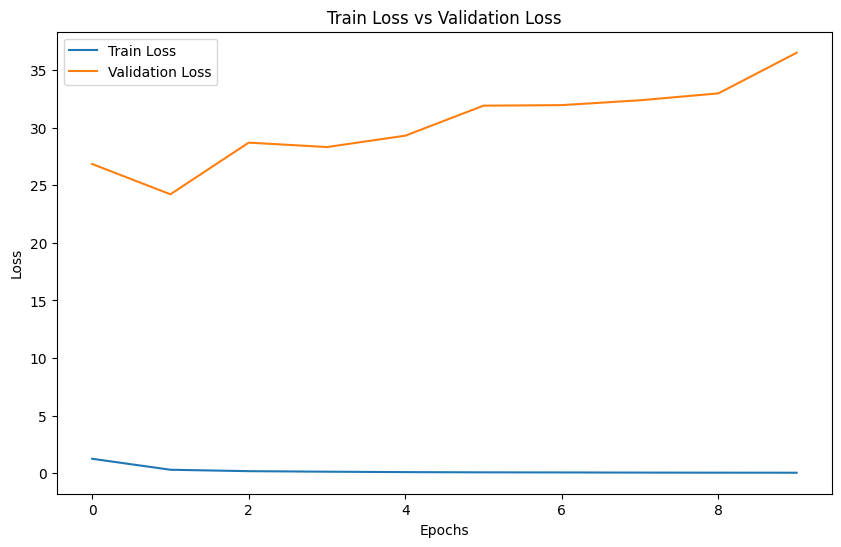

In [12]:
# Plot train loss vs validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()



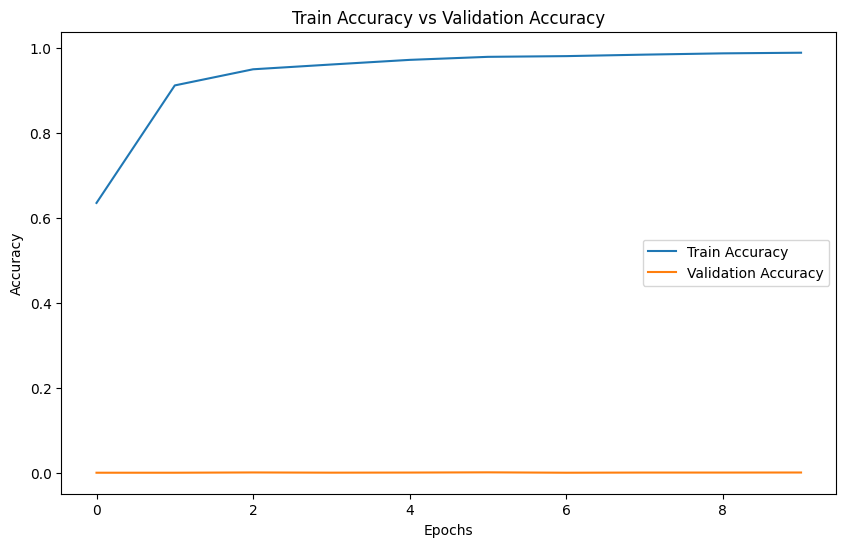

In [13]:
# Plot train accuracy vs validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [16]:
pip install -U scikit-learn

                                              0.0/8.3 MB ? eta -:--:--
     --                                       0.6/8.3 MB 18.9 MB/s eta 0:00:01
     --------                                 1.8/8.3 MB 19.2 MB/s eta 0:00:01
     -----------------                        3.6/8.3 MB 22.8 MB/s eta 0:00:01
     ---------------------------              5.6/8.3 MB 25.6 MB/s eta 0:00:01
     --------------------------------------   8.0/8.3 MB 28.5 MB/s eta 0:00:01
     ---------------------------------------- 8.3/8.3 MB 26.4 MB/s eta 0:00:00
                                              0.0/298.0 kB ? eta -:--:--
     ---------------------------------------- 298.0/298.0 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


1/1 [==============================] - 0s 16ms/step


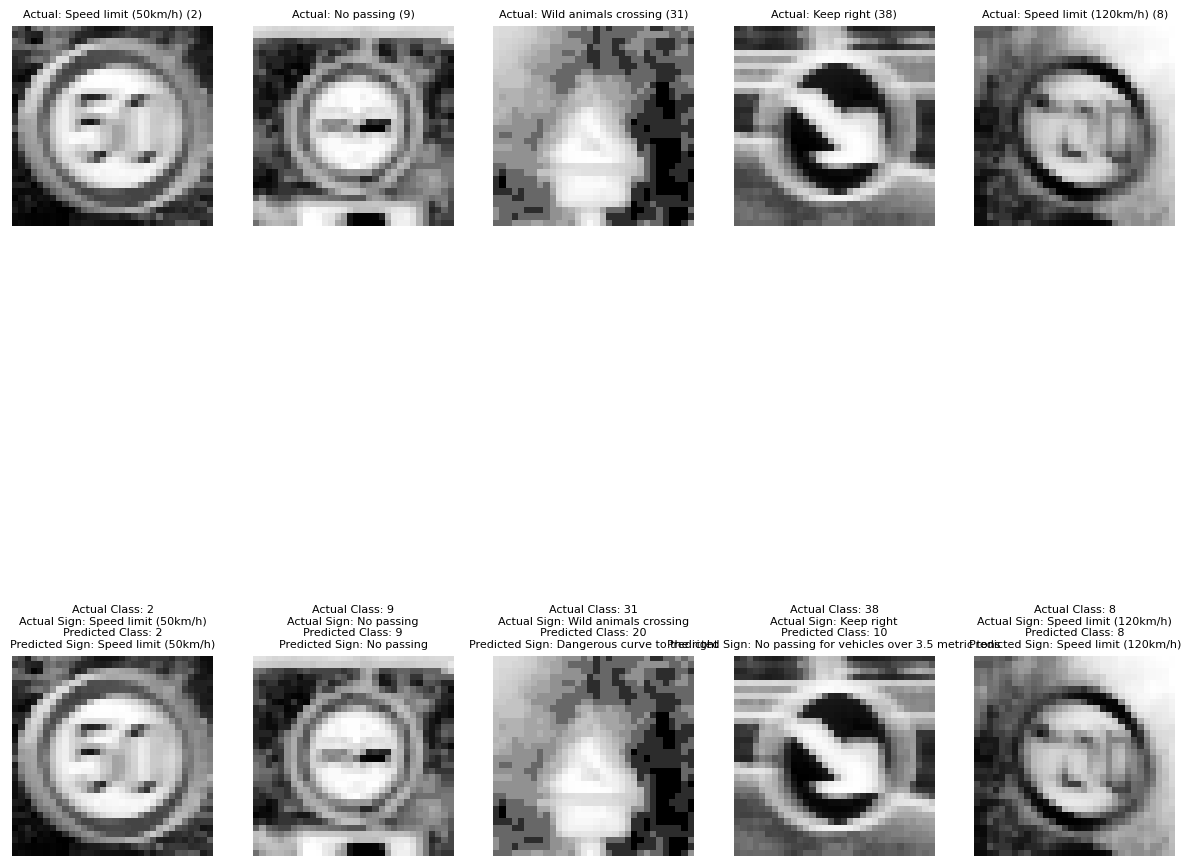

In [18]:
# Load the label names
label_names = pd.read_csv('C:/Users/Ambipalm/Downloads/archive (10)/label_names.csv')
classid_to_signname = dict(zip(label_names['ClassId'], label_names['SignName']))

# Update the display_prediction function to show sign names on separate lines
def display_prediction(img, y_true, y_pred, classid_to_signname):
    plt.imshow(img, cmap='gray')
    plt.title(f"Actual Class: {y_true}\nActual Sign: {classid_to_signname[y_true]}\nPredicted Class: {y_pred}\nPredicted Sign: {classid_to_signname[y_pred]}", fontsize=8)
    plt.axis('off')

# Display 5 images
num_samples = 5
random_indices = random.sample(range(len(test_images)), num_samples)

# Display images and predictions
plt.figure(figsize=(15, 15))
for i, index in enumerate(random_indices):
    # Display the original image before preprocessing
    plt.subplot(2, num_samples, i + 1)
    plt.imshow(test_images[index], cmap='gray')
    plt.title(f"Actual: {classid_to_signname[test_labels[index]]} ({test_labels[index]})", fontsize=8)
    plt.axis('off')
    
    # Display the predicted class and the corresponding image after preprocessing
    plt.subplot(2, num_samples, num_samples + i + 1)
    y_pred_one_hot = model.predict(test_images_expanded[index:index + 1])
    y_pred = np.argmax(y_pred_one_hot, axis=1)[0]
    display_prediction(test_images[index], test_labels[index], y_pred, classid_to_signname)

plt.show()


In [20]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred_one_hot = model.predict(test_images_expanded)
y_pred = np.argmax(y_pred_one_hot, axis=1)

# Calculate and display the confusion matrix
conf_mat = confusion_matrix(test_labels, y_pred)
print("Confusion Matrix:")
print(conf_mat)

# Calculate and display the classification report
report = classification_report(test_labels, y_pred, target_names=classid_to_signname.values())
print("\nClassification Report:")
print(report)


395/395 [==============================] - 1s 3ms/step
Confusion Matrix:
[[ 47   9   0 ...   0   0   0]
 [  4 666  21 ...   0   0   0]
 [  0   2 742 ...   0   0   0]
 ...
 [  1   1   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]

Classification Report:
                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       0.76      0.78      0.77        60
                              Speed limit (30km/h)       0.93      0.93      0.93       720
                              Speed limit (50km/h)       0.79      0.99      0.88       750
                              Speed limit (60km/h)       0.78      0.91      0.84       450
                              Speed limit (70km/h)       0.94      0.90      0.92       660
                              Speed limit (80km/h)       0.84      0.88      0.86       630
                       End of speed limit (80km/h)       0.54     

c:\users\ambipalm\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ambipalm\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ambipalm\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [21]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the predictions
accuracy = accuracy_score(test_labels, y_pred)
print(f"Accuracy of predictions: {accuracy * 100:.2f}%")


Accuracy of predictions: 74.41%


In [26]:
import cv2
import numpy as np



def predict_image(model, img, classid_to_signname):
    try:
        preprocessed_img = preprocess_img(img)
        expanded_img = np.expand_dims(preprocessed_img, axis=(0, 3))
        y_pred_one_hot = model.predict(expanded_img)
        y_pred = np.argmax(y_pred_one_hot, axis=1)[0]
        return y_pred, classid_to_signname[y_pred]
    except:
        return None, "Not a traffic sign"

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("No camera detected.")
else:
    while True:
        ret, frame = cap.read()

        if not ret:
            break

        # Make a prediction on the captured frame
        predicted_class, predicted_sign_name = predict_image(model, frame, classid_to_signname)

        if predicted_class is not None:
            # Display the predicted sign name on the frame
            cv2.putText(frame, f"Predicted: {predicted_class} - {predicted_sign_name}", (10, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

        cv2.imshow('Camera Feed', frame)

        key = cv2.waitKey(1) & 0xFF
        if key == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

1/1 [==============================] - 0s 15ms/step
